In [ ]:
#Importación de las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
##Se utilizaron gráficas de barras, circulares y lineales con sus respectivos codigos (.bar,.)
plt.style.use('classic')

df = pd.read_csv("Sales1.csv")

In [ ]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
# Cambiar la fecha a datetime para trabajar con ella
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Verificar que cada registro representa una venta distinta
df.drop_duplicates('Invoice ID')['Invoice ID'].count()

1000

In [ ]:
#Modificaciones de estilo
plt.style.use('fivethirtyeight')
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

Text(0.5, 1.0, 'Ventas por Sucursal')

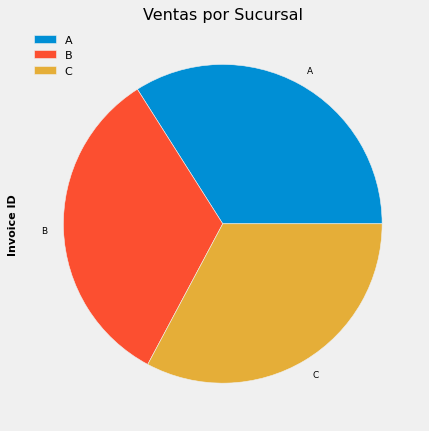

In [ ]:
#Obtener cantidad de ventas por sucursal
ventas= df.groupby('Branch')[['Invoice ID']].count()
ventas
ventas.plot.pie(subplots = True)
plt.title("Ventas por Sucursal")

Invoice ID          
Branch          A    B    C
Gender                     
Female        161  162  178
Male          179  170  150

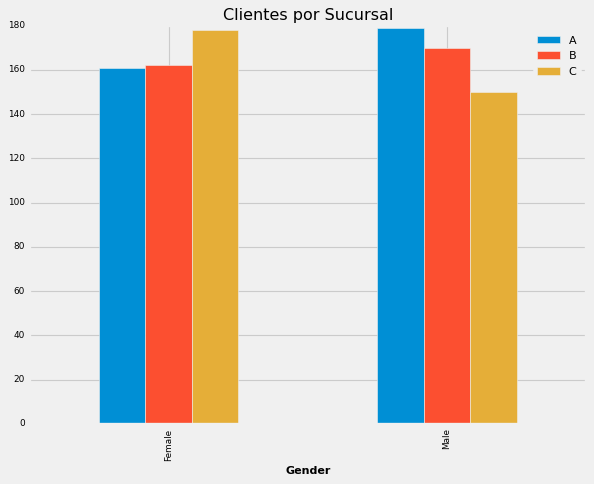

In [ ]:
#Obtener cantidad de clientes, agrupados por genero y sucursal
BranchGender=df.groupby(['Branch', 'Gender'])[['Invoice ID']].count().unstack(0)
BranchGender.plot.bar()
plt.title("Clientes por Sucursal")
plt.legend(["A", "B", "C"])
BranchGender

,Quantity,gross income
Branch,,
A,1859,5057.1605
B,1820,5057.0320
C,1831,5265.1765


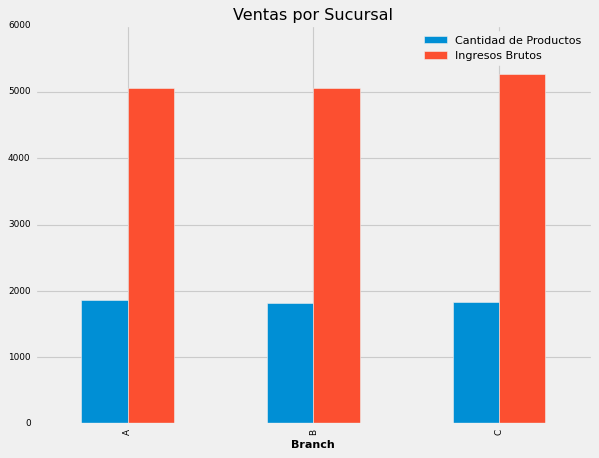

In [ ]:
#Cantidad de ventas e ingresos por sucursal
Grossinc=df.groupby('Branch')[['Quantity', 'gross income']].sum()
Grossinc.plot.bar()
plt.title("Ventas por Sucursal")
plt.legend(["Cantidad de Productos", "Ingresos Brutos"])
Grossinc

,Rating
Branch,
A,7.027059
B,6.818072
C,7.072866


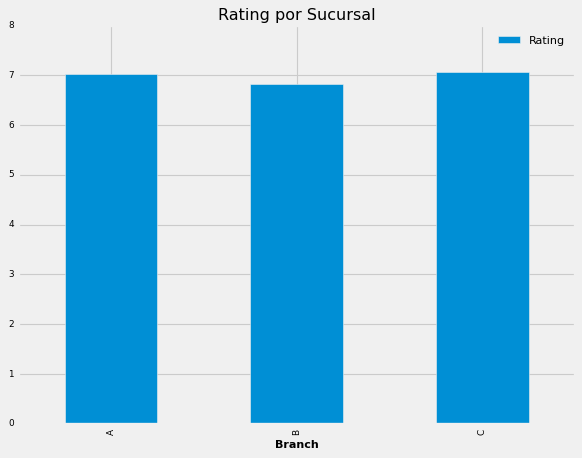

In [ ]:
#Rating promedio por Sucursal
Rating= df.groupby('Branch')[['Rating']].mean()
Rating.sort_values(by=['Rating'], ascending=False) 
Rating.plot.bar()
plt.title("Rating por Sucursal")
Rating

Text(0.5, 0, 'Mes (en Número)')

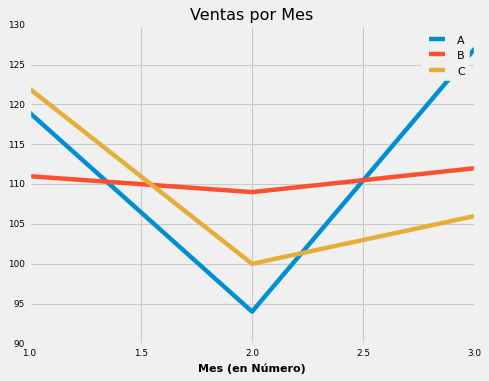

In [ ]:
#Ventas totales a traves de los meses. Cada numero entero representa un mes.
df['Month'] = df['Date'].dt.month
ganancias_por_mes = df.groupby(['Branch', 'Month'])[['Invoice ID']].count().unstack(0)
ganancias_por_mes
ganancias_por_mes.plot()
plt.title("Ventas por Mes")
plt.legend(["A", "B", "C"])
plt.xlabel("Mes (en Número)")

Text(0.5, 1.0, 'Distribucion de Clientes')

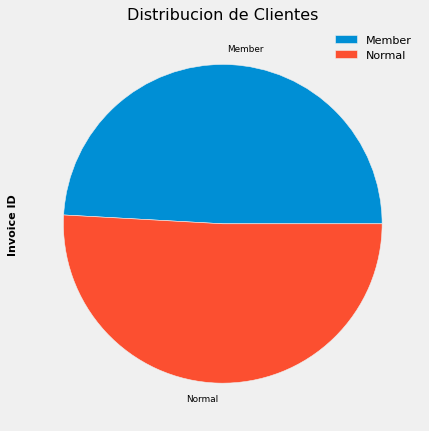

In [ ]:
#Comparacion de clientes normales vs miembros
tipos_clientes = df[df['Branch'] == 'A'].groupby("Customer type")[["Invoice ID"]].count()
tipos_clientes
tipos_clientes.plot.pie(subplots = True)
plt.title("Distribucion de Clientes")

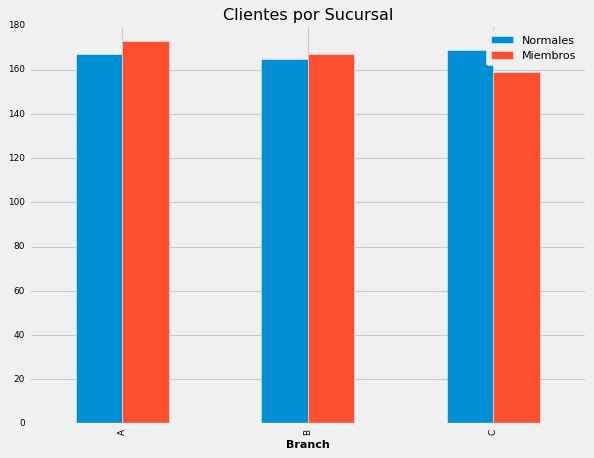

In [ ]:
#Tipos de Clientes agrupados por sucursal
Miembros=df.groupby(['Customer type','Branch'])[["Customer type"]].count().unstack(0)
Miembros
Miembros.plot.bar()
plt.title("Clientes por Sucursal")
plt.legend(['Normales','Miembros'])

Text(0.5, 1.0, 'Tipos de Pago en Sucursal A')

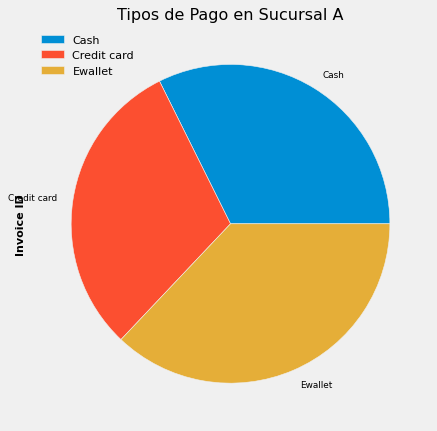

In [ ]:
#Distribucion de tipos de pagos por sucursal
Payment=df[df['Branch'] == 'A'].groupby('Payment')[['Invoice ID']].count()
Payment.sort_values(by=['Invoice ID'], ascending=False)
Payment
Payment.plot.pie(subplots = True)
plt.title("Tipos de Pago en Sucursal A")

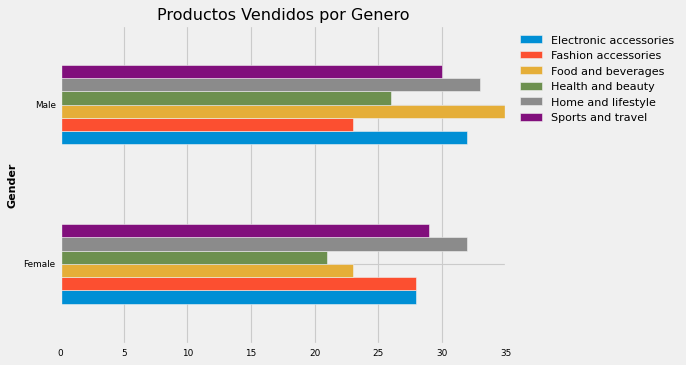

In [ ]:
#Ventas agrupadas por linea de producto y genero
productos_por_genero = df[df['Branch'] == 'A'].groupby(['Product line', 'Gender'])[['Quantity']].count().unstack(0)
productos_por_genero
productos_por_genero.plot.barh()
plt.title("Productos Vendidos por Genero")
plt.legend(["Electronic accessories",	"Fashion accessories",	"Food and beverages",	"Health and beauty",	"Home and lifestyle",	"Sports and travel"], bbox_to_anchor=(1.4, 1))

Text(0.5, 1.0, 'Mayores compras por Linea de Producto')

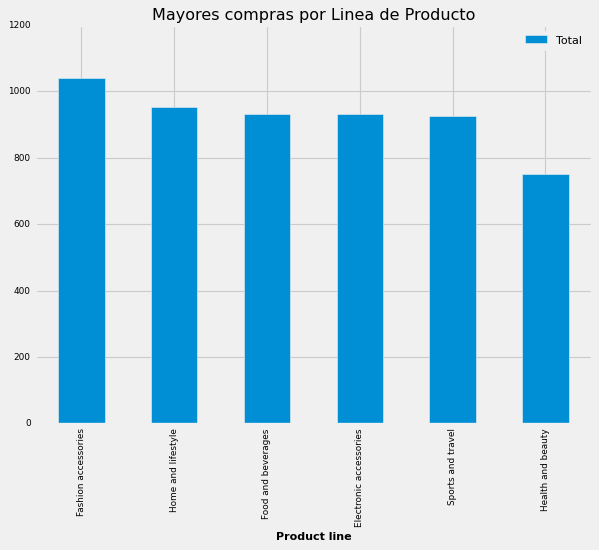

In [ ]:
#Compras mas caras realizadas en cada linea de producto
linea_precio = df[df['Branch'] == 'A'].groupby("Product line")[["Total"]].max().sort_values("Total", ascending=False)
linea_precio
linea_precio.plot.bar()
plt.title("Mayores compras por Linea de Producto")

Text(0.5, 1.0, 'Ventas por Linea de Producto: Sucursal A')

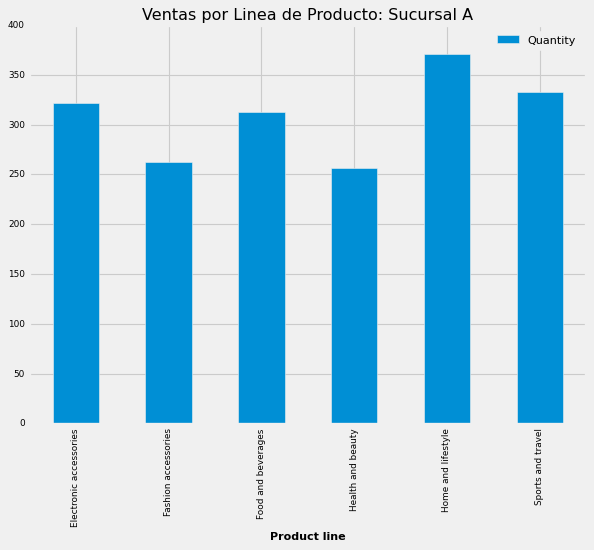

In [ ]:
#Ventas agrupadas por linea de producto en la sucursal A
suma=df[df['Branch'] == 'A'].groupby('Product line')[['Quantity']].sum()
suma.sort_values(by=['Quantity'], ascending=False)
suma.plot.bar()
plt.title("Ventas por Linea de Producto: Sucursal A")

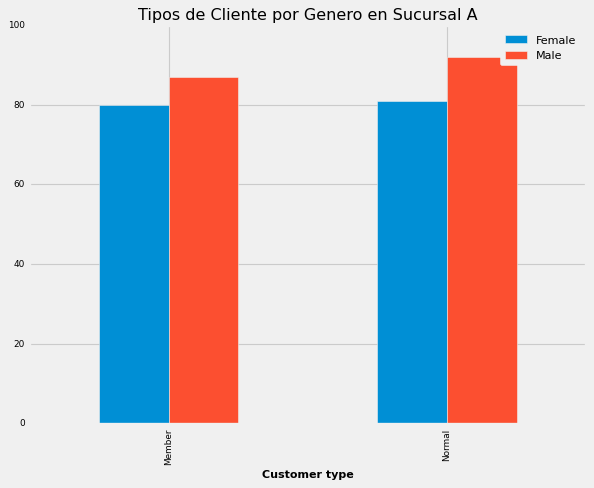

In [ ]:
#Clientes agrupados por tipo y por genero, en la sucursal A
Typegen=df[df['Branch'] == 'A'].groupby(['Gender','Customer type'])[['Invoice ID']].count().unstack(0)
Typegen
Typegen.plot.bar()
plt.title("Tipos de Cliente por Genero en Sucursal A")
plt.legend(["Female", "Male"])

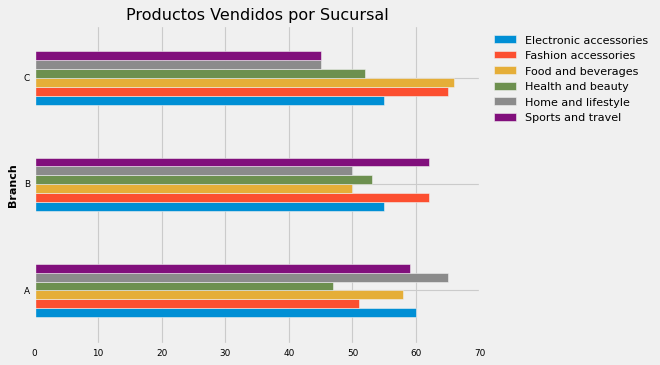

In [ ]:
#Ventas agrupadas por linea de producto y sucursal.
productos_por_sucursal = df.groupby(['Product line', 'Branch'])[['Quantity']].count().unstack(0)
productos_por_sucursal
productos_por_sucursal.plot.barh()
plt.title("Productos Vendidos por Sucursal")
plt.legend(["Electronic accessories",	"Fashion accessories",	"Food and beverages",	"Health and beauty",	"Home and lifestyle",	"Sports and travel"], bbox_to_anchor=(1.4, 1))

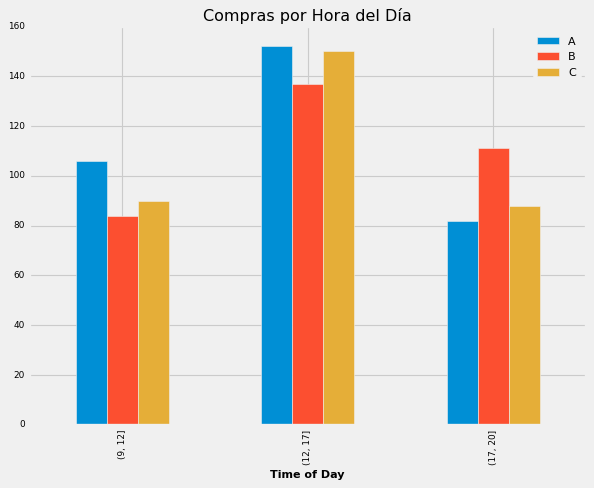

In [ ]:
#Ventas por hora del dia. Se agruparon las ventas en 3 horarios distintos para la comparacion. De 9 a.m. a 12. p.m., de 12 a 5 p.m. y de 5 a 5 p.m. 
df['Time of Day'] = pd.cut(pd.to_datetime(df['Time']).dt.hour, bins =[9, 12, 17, 20])
compras_por_tiempos = df.groupby(['Branch', 'Time of Day'])[['Invoice ID']].count().unstack(0)
compras_por_tiempos
compras_por_tiempos.plot.bar()
plt.title("Compras por Hora del Día")
plt.legend(["A", "B", "C"])

Text(0.5, 1.0, 'Ingresos por Linea de Producto')

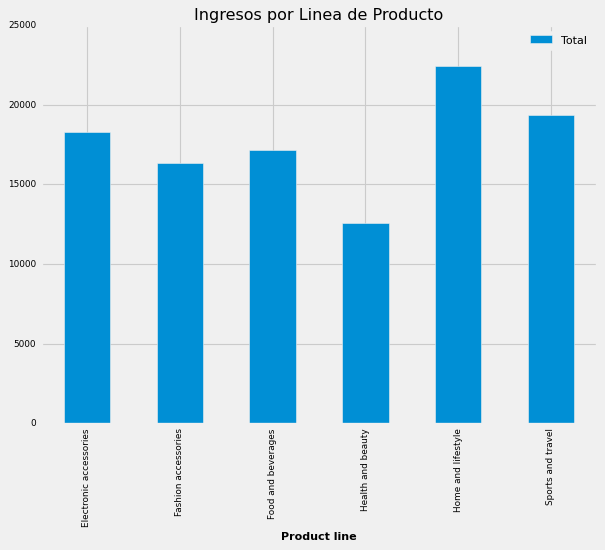

In [ ]:
##Total de ingresos por cada linea de producto
linea_precio = df[df['Branch'] == 'A'].groupby("Product line")[["Total"]].sum() 
linea_precio.sort_values(by=['Total'], ascending=False) 
linea_precio.plot.bar()
plt.title("Ingresos por Linea de Producto")